Multi-class Classification Model for Predicting Quality of Red wine

In [49]:
# Import necessary libraries
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np

In [50]:
# Set up Data
from sklearn.model_selection import train_test_split


data = pd.read_csv('CSV Files\winequality-red.csv').dropna()
y = data.loc[:,['quality']]
X = data.drop(columns=['quality'])


In [51]:
# Set up train/test data (print)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
998             8.9             0.840         0.34             1.4      0.050   
50              8.8             0.660         0.26             1.7      0.074   
366            12.8             0.615         0.66             5.8      0.083   
292            10.4             0.550         0.23             2.7      0.091   
1120            7.9             0.540         0.34             2.5      0.076   
...             ...               ...          ...             ...        ...   
1345            8.2             0.440         0.24             2.3      0.063   
581            12.3             0.500         0.49             2.2      0.089   
121             8.8             0.550         0.04             2.2      0.119   
1262            9.8             0.450         0.38             2.5      0.081   
681             8.0             0.450         0.23             2.2      0.094   

      free sulfur dioxide  

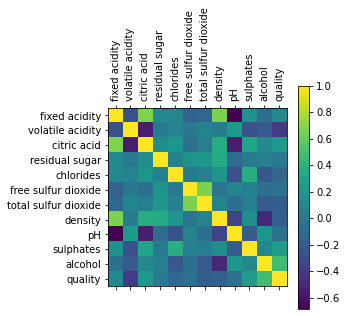

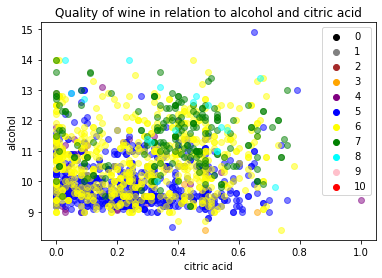

In [52]:
# Visualize data

plt.matshow(data.corr())
plt.xticks(np.arange(12), data.columns, rotation=90)
plt.yticks(np.arange(12), data.columns, rotation=0)
plt.colorbar()
plt.show()

def plot(x_label, y_label, origin_data):
    graph_data = pd.concat([origin_data.loc[:, [x_label]], origin_data.loc[:, [y_label]]], axis=1)
    plot_list = []
    quality_colors = ['black', 'gray', 'brown', 'orange', 'purple', 'blue', 'yellow', 'green', 'cyan', 'pink', 'red']
    for quality_value in range(0, 11):
        plot_list.append((origin_data.loc[origin_data[origin_data['quality'] == quality_value].index.tolist()], quality_value))
    color_index = 0
    for plot in plot_list:
        plt.scatter(x=plot[0][x_label], y=plot[0][y_label], color=quality_colors[color_index], alpha=0.5, label = plot[1])
        color_index += 1
    
    plt.xlabel(f'{x_label}')
    plt.ylabel(f'{y_label}')
    plt.title(f'Quality of wine in relation to {y_label} and {x_label}')
    legend = plt.legend(loc = 'upper right')
    for point in legend.legendHandles: 
        point.set_alpha(1)
        
plot('citric acid', 'alcohol', data)

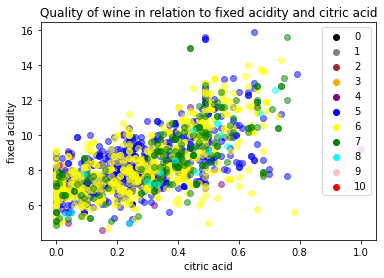

In [53]:
plot('citric acid', 'fixed acidity', data)

Score : 0.5854166666666667
RMSE: 0.8100925873009825


Text(0.5, 1.0, 'Predicted vs Test Results')

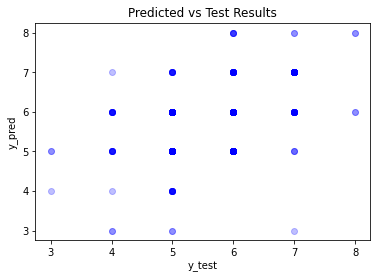

In [54]:
# Train/Test Classification Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score


tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

score = accuracy_score(y_test,y_pred)

print('Score :',score) # interestingly, this time, the score was pretty low, at 0.59
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.scatter(x=y_test, y=y_pred, color='blue', alpha=0.25)
plt.title('Predicted vs Test Results')

# Hard to plot discrete values

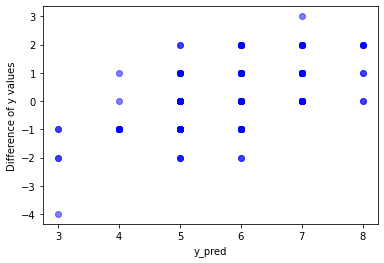

In [55]:
# Score Evalutation Model


plt.xlabel('y_pred')
plt.ylabel('Difference of y values')
difference = []
index = 0
#correct_y = y_test[:]
for pred, test in zip(y_pred, y_test.values.tolist()):
    difference.append(pred - test)
    index += 1

difference = pd.DataFrame(difference)
plt.scatter(y_pred, difference, color = 'blue', alpha = 0.5)

